In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/predict-pet-adoption-status-dataset/pet_adoption_data.csv')

df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,103,Black,Large,16.357608,1,0,43,335,0,0
1,501,Rabbit,Labrador,8,Black,Medium,12.625582,0,0,50,93,0,1
2,502,Dog,Parakeet,153,Gray,Small,9.624407,0,0,3,79,0,0
3,503,Bird,Golden Retriever,91,Gray,Medium,20.770021,0,0,59,37,1,0
4,504,Bird,Golden Retriever,174,Gray,Medium,7.025923,1,0,28,407,0,1


In [3]:
df.shape

(2007, 13)

In [4]:
df.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.627803,15.699563,0.706527,0.199801,44.818635,251.690583,0.306926,0.338316
std,579.515315,51.527384,8.444901,0.455467,0.399950,25.676587,144.552893,0.461333,0.473255
min,500.000000,1.000000,1.039310,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,49.000000,8.660533,0.000000,0.000000,22.000000,129.500000,0.000000,0.000000
50%,1503.000000,93.000000,15.752066,1.000000,0.000000,45.000000,250.000000,0.000000,0.000000
75%,2004.500000,138.000000,23.140205,1.000000,0.000000,67.000000,374.000000,1.000000,1.000000
max,2506.000000,179.000000,29.992795,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [7]:
df.dtypes

PetID                   int64
PetType                object
Breed                  object
AgeMonths               int64
Color                  object
Size                   object
WeightKg              float64
Vaccinated              int64
HealthCondition         int64
TimeInShelterDays       int64
AdoptionFee             int64
PreviousOwner           int64
AdoptionLikelihood      int64
dtype: object

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df.drop(['AdoptionLikelihood', 'PetID'], axis=1)
y = df['AdoptionLikelihood']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['PetType', 'Breed', 'Color', 'Size']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       259
           1       0.74      0.73      0.73       143

    accuracy                           0.81       402
   macro avg       0.80      0.79      0.80       402
weighted avg       0.81      0.81      0.81       402

Confusion Matrix:
[[223  36]
 [ 39 104]]


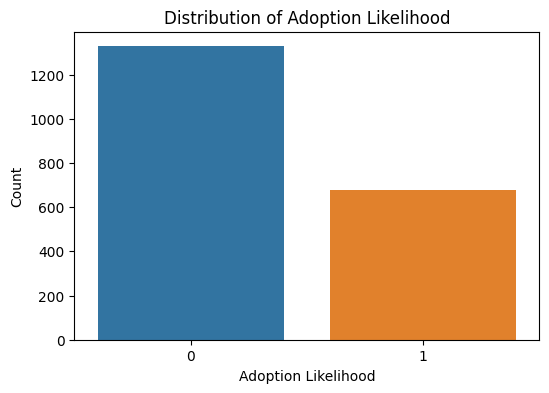

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Adoption Likelihood
plt.figure(figsize=(6, 4))
sns.countplot(x='AdoptionLikelihood', data=df)
plt.title('Distribution of Adoption Likelihood')
plt.xlabel('Adoption Likelihood')
plt.ylabel('Count')
plt.show()

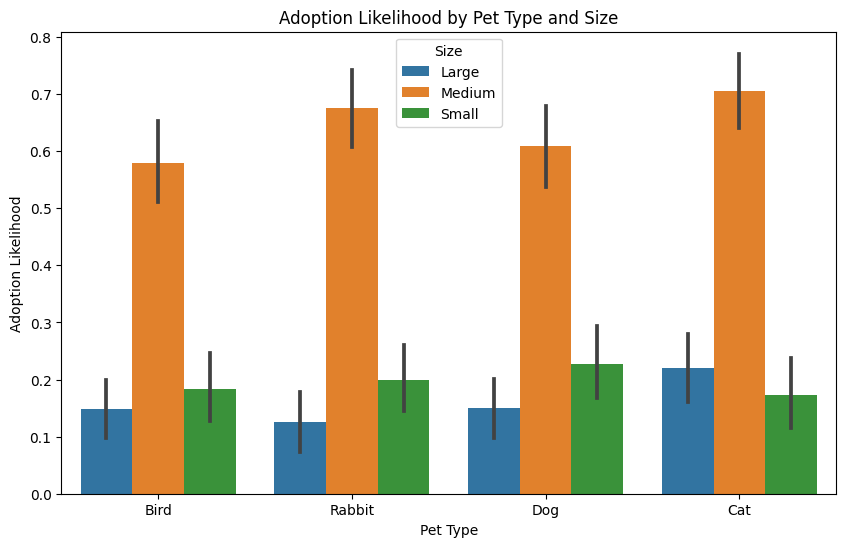

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PetType', y='AdoptionLikelihood', hue='Size', data=df)
plt.title('Adoption Likelihood by Pet Type and Size')
plt.xlabel('Pet Type')
plt.ylabel('Adoption Likelihood')
plt.legend(title='Size')
plt.show()

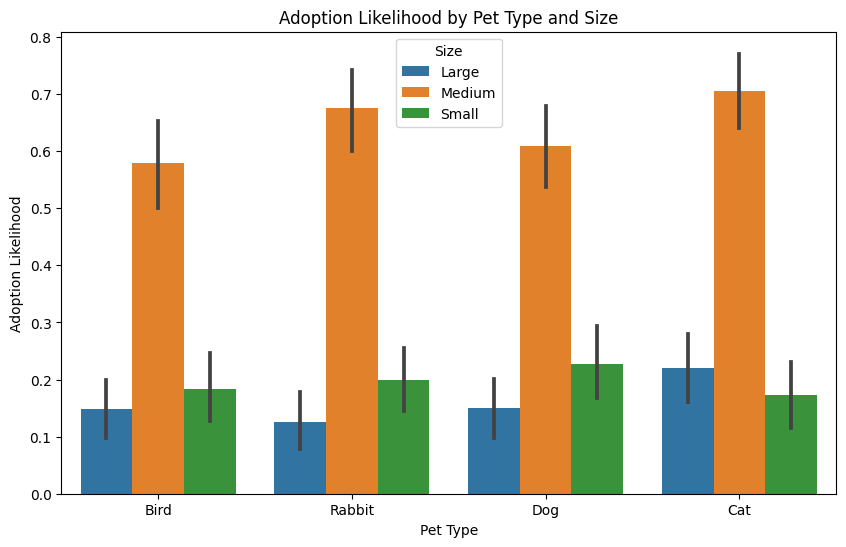

In [31]:
# Adoption Likelihood by Pet Type and Size
plt.figure(figsize=(10, 6))
sns.barplot(x='PetType', y='AdoptionLikelihood', hue='Size', data=df)
plt.title('Adoption Likelihood by Pet Type and Size')
plt.xlabel('Pet Type')
plt.ylabel('Adoption Likelihood')
plt.legend(title='Size')
plt.show()

In [32]:
import urllib.request

In [33]:
def adjust_adoption_fee(adoption_fee,size,health_condition ):
    if health_condition==1:
        adoption_fee*=0.8
    if size=='Small':
        adoption_fee*=1.1
    return adoption_fee

df['AdjustedAdoptionFee']=df.apply(lambda row:adjust_adoption_fee(row['AdoptionFee'],row['Size'],row['HealthCondition']),axis=1)
        

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


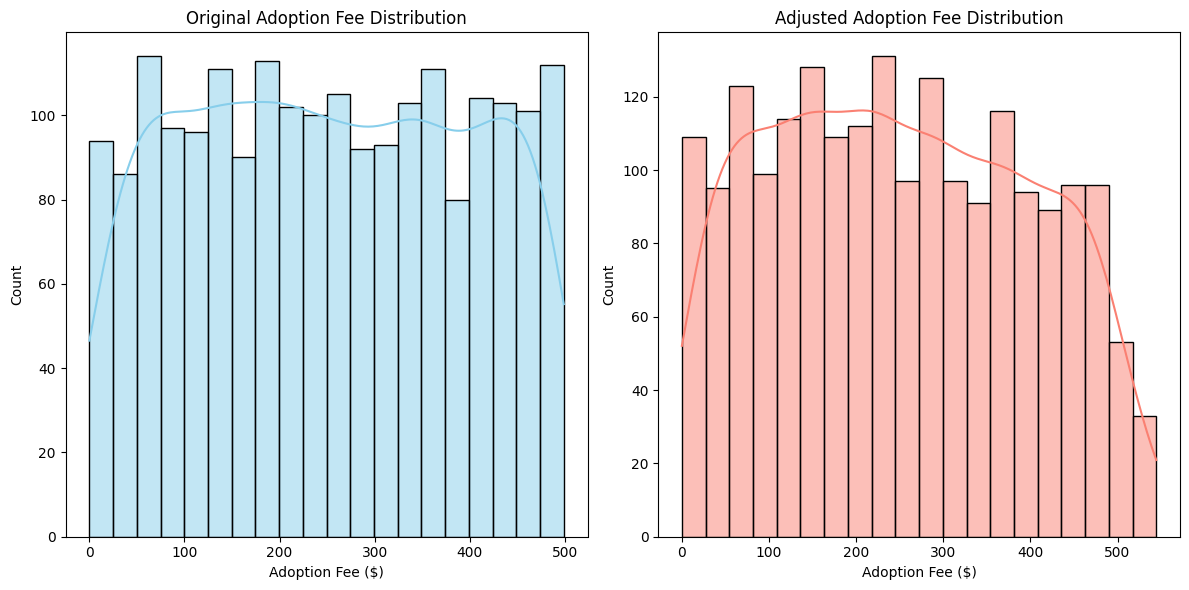

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['AdoptionFee'], bins=20, kde=True, color='skyblue')
plt.title('Original Adoption Fee Distribution')
plt.xlabel('Adoption Fee ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['AdjustedAdoptionFee'], bins=20, kde=True, color='salmon')
plt.title('Adjusted Adoption Fee Distribution')
plt.xlabel('Adoption Fee ($)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [35]:
def generate_pet_description(row):
    description = f"Type: {row['PetType']}\n"
    description += f"Breed: {row['Breed']}\n"
    description += f"Color: {row['Color']}\n"
    description += f"Size: {row['Size']}\n"
    description += f"Age: {row['AgeMonths']} months\n"
    if row['HealthCondition'] == 1:
        description += "Health Condition: Medical condition\n"
    else:
        description += "Health Condition: Healthy\n"
    description += f"Adoption Fee: ${row['AdjustedAdoptionFee']:.2f}\n"
    description += f"Time in Shelter: {row['TimeInShelterDays']} days\n"
    return description


In [37]:
df['Description'] = df.apply(generate_pet_description, axis=1)
def virtual_adoption_event(df, num_pets=5):
    print("Welcome to our Virtual Adoption Event!")
    print("Explore our featured pets:")
    for i, row in df.sample(num_pets).iterrows():
        print(f"Pet ID: {row['PetID']}")
        print(row['Description'])
        print("------------------------")

# Example of hosting a virtual adoption event
virtual_adoption_event(df)

Welcome to our Virtual Adoption Event!
Explore our featured pets:
Pet ID: 589
Type: Cat
Breed: Siamese
Color: Brown
Size: Medium
Age: 48 months
Health Condition: Medical condition
Adoption Fee: $31.20
Time in Shelter: 17 days

------------------------
Pet ID: 1253
Type: Cat
Breed: Parakeet
Color: White
Size: Large
Age: 91 months
Health Condition: Healthy
Adoption Fee: $76.00
Time in Shelter: 83 days

------------------------
Pet ID: 1542
Type: Bird
Breed: Persian
Color: Gray
Size: Large
Age: 24 months
Health Condition: Healthy
Adoption Fee: $252.00
Time in Shelter: 18 days

------------------------
Pet ID: 2275
Type: Rabbit
Breed: Labrador
Color: Gray
Size: Small
Age: 141 months
Health Condition: Healthy
Adoption Fee: $71.50
Time in Shelter: 63 days

------------------------
Pet ID: 1265
Type: Bird
Breed: Parakeet
Color: Black
Size: Medium
Age: 59 months
Health Condition: Healthy
Adoption Fee: $340.00
Time in Shelter: 87 days

------------------------
